Let's import all the necessary libraries to start our analysis

In [41]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Loading the data file -

In [6]:
Data = pd.read_csv('all_data.csv')
print(Data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


Let's perform some summary statistics first

In [63]:
print(Data[["Life expectancy at birth (years)", "GDP"]].describe())



       Life expectancy at birth (years)           GDP
count                         96.000000  9.600000e+01
mean                          72.789583  3.880499e+12
std                           10.672882  5.197561e+12
min                           44.300000  4.415703e+09
25%                           74.475000  1.733018e+11
50%                           76.750000  1.280220e+12
75%                           78.900000  4.067510e+12
max                           81.000000  1.810000e+13
Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64


Has Life expectancy increased over time in the six nations? Let's perform time series analysis using a Line chart

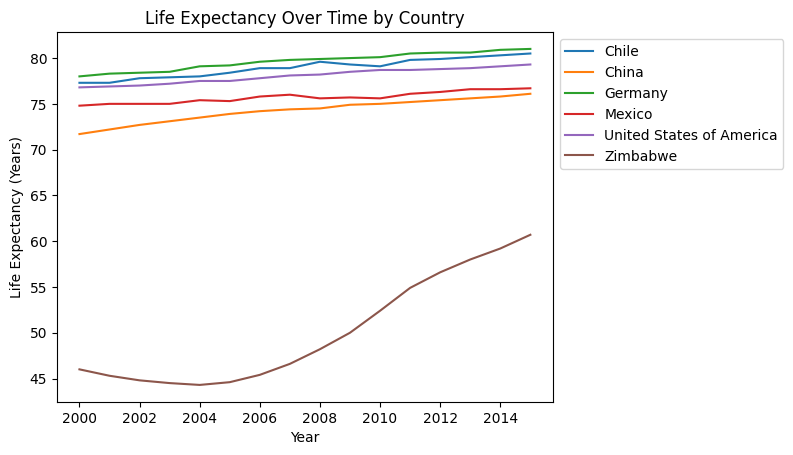

<Figure size 640x480 with 0 Axes>

In [20]:
sns.lineplot(data = Data, x = 'Year', y = 'Life expectancy at birth (years)', hue = 'Country')
plt.title("Life Expectancy Over Time by Country")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (Years)")
plt.legend(title='Country')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
plt.clf()

From this graph, we can figuer that overall life expectancy has increased but Zimbabwe where life expectancy was very low in 2000 and hit the bottom in 2004 has gotten significantly better over the years

Now, Has GDP increased over time in the six nations? Let's find out using another time series analysis using a Line chart

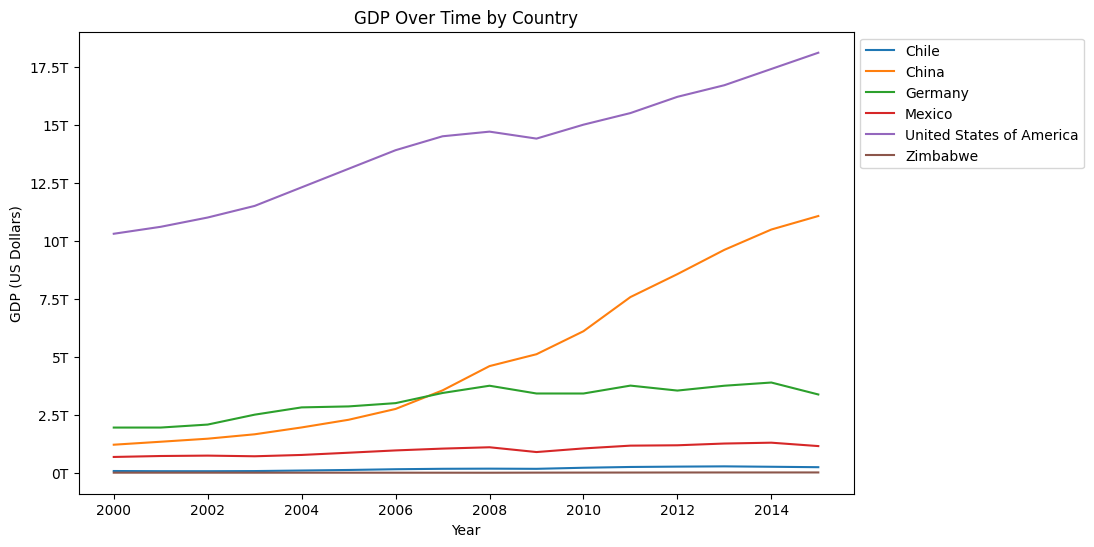

<Figure size 640x480 with 0 Axes>

In [36]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=Data, x="Year", y="GDP", hue="Country")
plt.title("GDP Over Time by Country")
plt.xlabel("Year")
plt.ylabel("GDP (US Dollars)")

ytick_positions = [0, 2.5e12, 5e12, 7.5e12, 1e13, 1.25e13, 1.5e13, 1.75e13]


ytick_labels = ['0T', '2.5T', '5T', '7.5T', '10T', '12.5T', '15T', '17.5T']

plt.yticks(ytick_positions, ytick_labels)


plt.legend(title='Country')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
plt.clf()

USA was already performing at the top and still looks like it's at the lead, growing even further, however, China also showed significant improvement,
grew it's GDP exponentially and almost tripled it over the years, On the other hand, remaining nations in the dataset remained quite stagnant over the years

Next question that I would like to address is - Is there a correlation between GDP and life expectancy of a country?
Let's find out using correlation analysis and see if they have a linear relationship using a Scatter plot

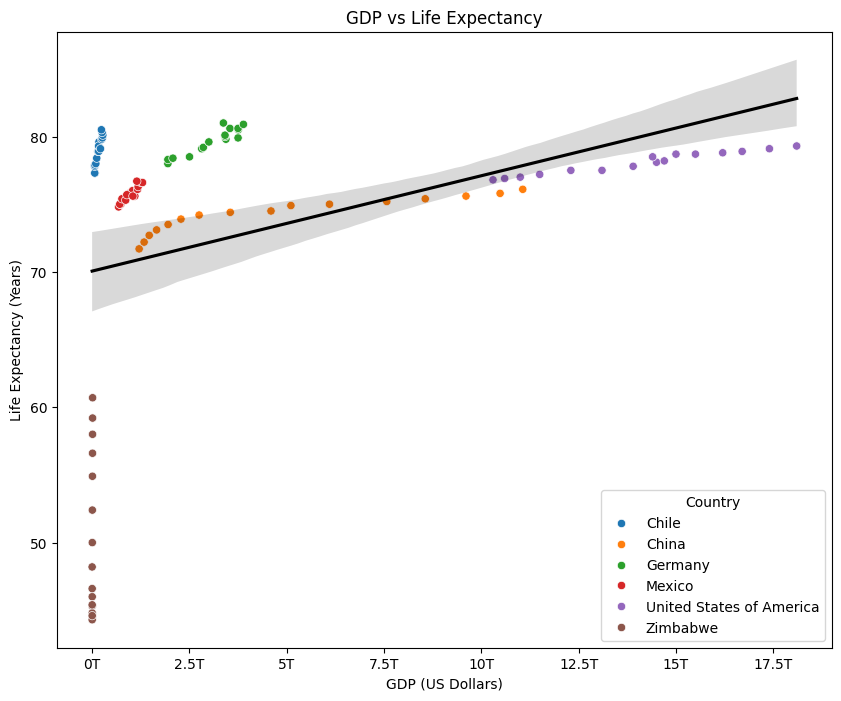

<Figure size 640x480 with 0 Axes>

In [46]:
plt.figure(figsize = (10,8))

sns.scatterplot(data=Data, x="GDP", y="Life expectancy at birth (years)", hue="Country")

sns.regplot(data=Data, x="GDP", y="Life expectancy at birth (years)", scatter=False, color='black')

xtick_positions = [0, 2.5e12, 5e12, 7.5e12, 1e13, 1.25e13, 1.5e13, 1.75e13]


xtick_labels = ['0T', '2.5T', '5T', '7.5T', '10T', '12.5T', '15T', '17.5T']

plt.xticks(ytick_positions, ytick_labels)
plt.title("GDP vs Life Expectancy")
plt.xlabel("GDP (US Dollars)")
plt.ylabel("Life Expectancy (Years)")
plt.show()
plt.clf()

The regression line or the trend line indicates that there is a positive correlation between Life Expectancy and GDP but there is a outlier which is Zimbabwe where Life Expectancy grew over the years without a real noticable growth in GDP. So, for being sure about our analysis let's calculate Pearson's correlation coefficient and find solid proof wether there's a positive correlation or not

In [44]:
gdp = Data["GDP"]
life_expectancy = Data["Life expectancy at birth (years)"]

correlation_coefficient, p_value = pearsonr(gdp, life_expectancy)
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

Pearson Correlation Coefficient: 0.343206748449156
P-value: 0.0006187129569469888


The weak positive correlation (0.343) suggests that while there is some relationship between GDP and life expectancy, it is not very strong. There may be other factors influencing life expectancy that aren't captured by GDP alone.
The statistical significance (p-value < 0.05) implies that the correlation observed is reliable and not due to random variation in the data.

The next question that comes in our analysis is 
What is the average life expectancy in these nations? Let's find out using a bar chart

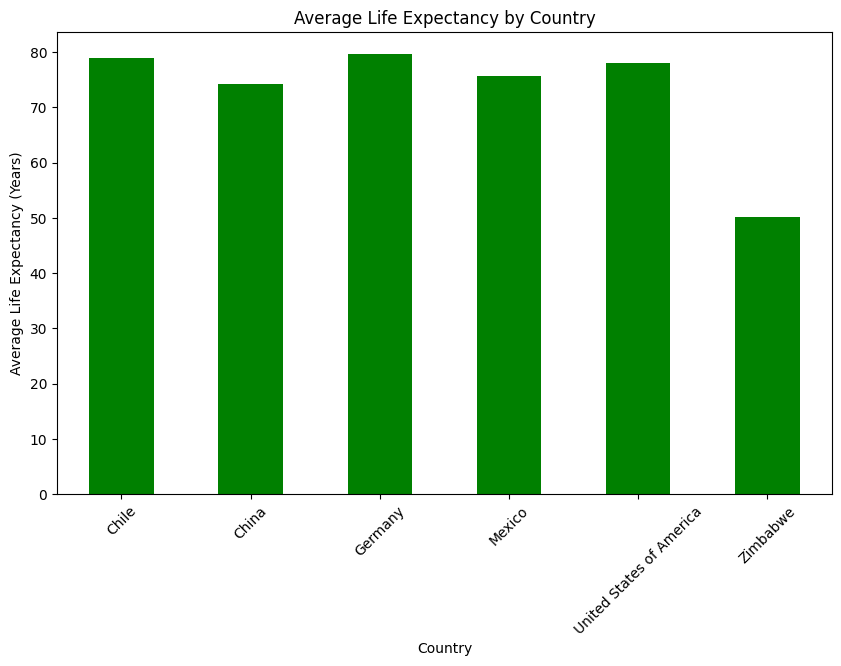

<Figure size 640x480 with 0 Axes>

In [55]:
avg_life_expectancy = Data.groupby("Country")["Life expectancy at birth (years)"].mean()


plt.figure(figsize=(10,6))

avg_life_expectancy.plot(kind="bar", color="green")


plt.title("Average Life Expectancy by Country")
plt.xlabel("Country")
plt.ylabel("Average Life Expectancy (Years)")
plt.xticks(rotation=45)
plt.show()
plt.clf()

Germany's life expectancy tops just slightly more than chile and USA, all of these countries have a similar average life expectancy but Zimbabwe on the other hand has a significantly lower average life expectancy of just about 45 which might be due to it's poverty driven population and low GDP figure.

Now, we might think what is the distribution of life expectancy in these nations, let's use a histogram to find out

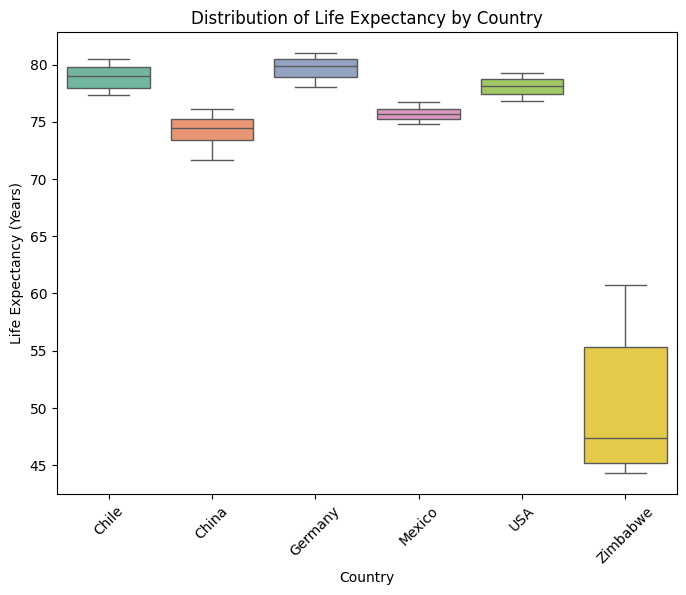

In [59]:
plt.figure(figsize = (8,6))
ax = sns.boxplot(data = Data, x="Country", y="Life expectancy at birth (years)", hue="Country", palette="Set2", legend=False) 
plt.xticks(ticks=range(len(ax.get_xticklabels())), labels=[label.get_text().replace("United States of America", "USA") for label in ax.get_xticklabels()], rotation=45)

plt.title("Distribution of Life Expectancy by Country")
plt.xlabel("Country")
plt.ylabel("Life Expectancy (Years)")
plt.xticks(rotation=45)
plt.show()

The highest life expectancy seems to come from Germany as we found out before and it's not widely distributed which is a good sign and shows the high quality of life Germany offers where cause of mortality is majourly old age and is followed closely by Chile which is quite surprising as it is not a 'Developed Nation' but this might be because of their robust public healthcare system and then USA, Mexico, China accordingly. 

Zimbabwe has the most distribution of life expectancy and on the lower end as well, the main concern here is mortaliy of population between the age of 43 and 60. The main reasons of these might be Zimbabwe's HIV/AIDS epidemic, poverty, and poor access to healthcare.